<a href="https://colab.research.google.com/github/PIYARJIMOHAMMED/internship-lab/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [15]:
!kaggle datasets download sanikamal/horses-or-humans-dataset

Dataset URL: https://www.kaggle.com/datasets/sanikamal/horses-or-humans-dataset
License(s): other
horses-or-humans-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
import os
import zipfile

local_zip = '/content/horses-or-humans-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content/tmp/horse-or-human')
# local_zip = '/tmp/validation-horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/validation-horse-or-human')
# zip_ref.close()

In [20]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/content/tmp/horse-or-human/horse-or-human/train')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/content/tmp/horse-or-human/horse-or-human/train')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/content/content/tmp/horse-or-human/horse-or-human/validation')

# Directory with our training human pictures
validation_human_dir = os.path.join('/content/content/tmp/horse-or-human/horse-or-human/validation')

In [21]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['humans', 'horses']
['humans', 'horses']


In [22]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 2
total training human images: 2


In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

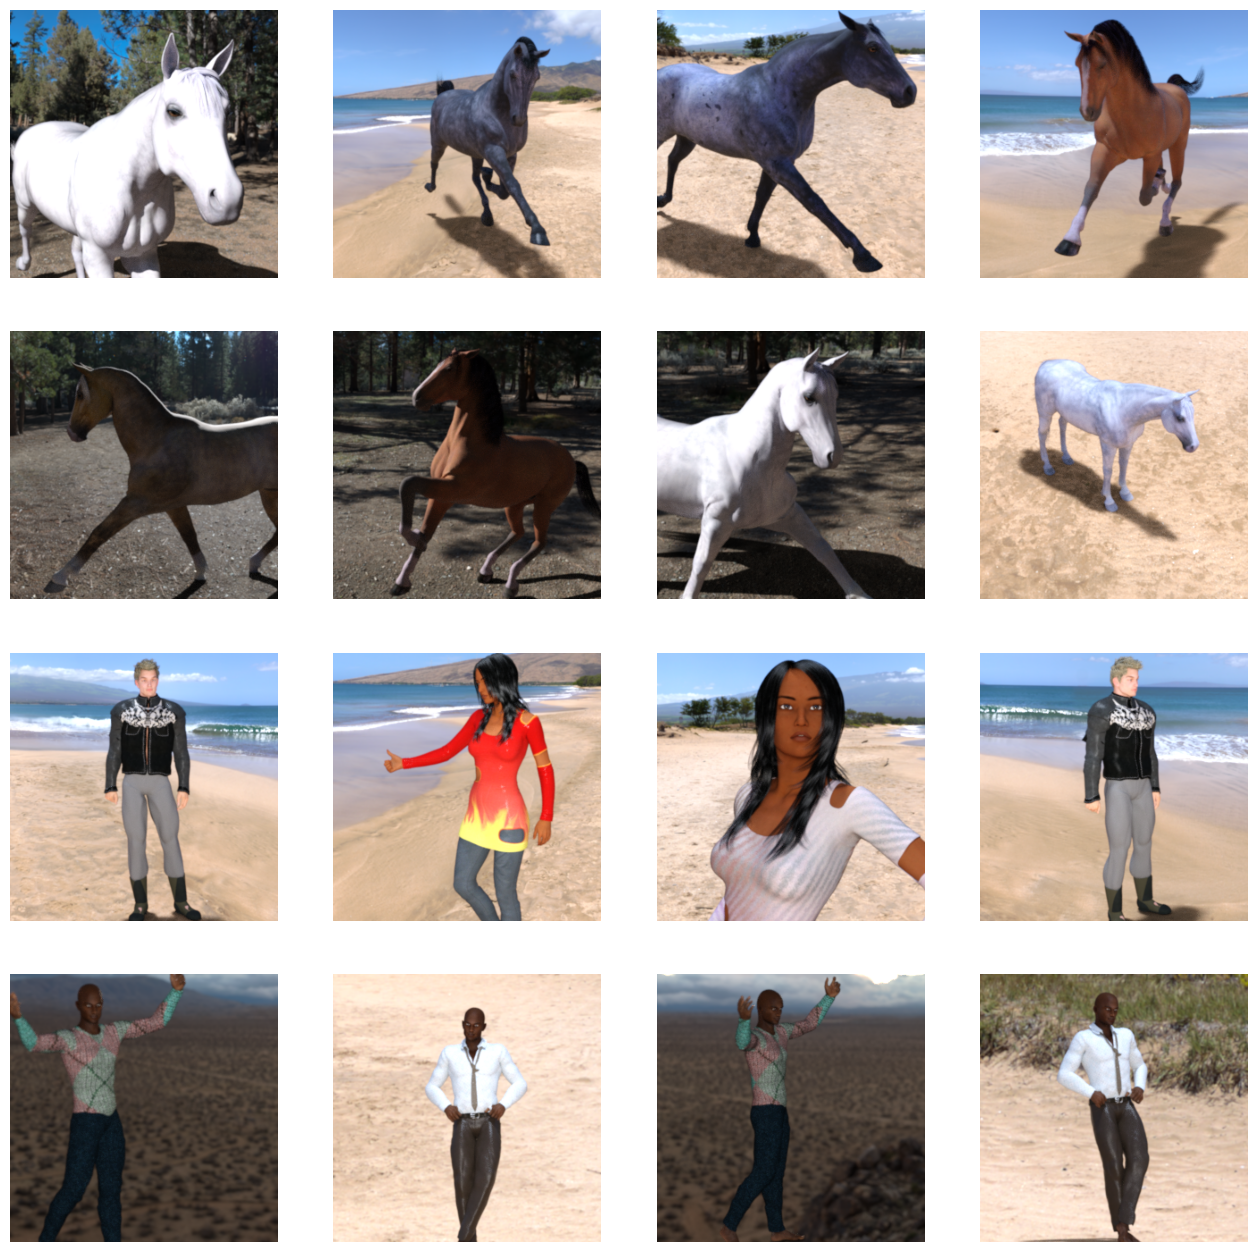

In [24]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

# Get the actual image file paths instead of directory paths
next_horse_pix = [os.path.join(train_horse_dir, 'horses', fname)
                for fname in os.listdir(os.path.join(train_horse_dir, 'horses'))[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, 'humans', fname)
                for fname in os.listdir(os.path.join(train_human_dir, 'humans'))[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [25]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [26]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 298, 298, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 149, 149, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 147, 147, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 78400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      40,141,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,165,409 (153.22 MB)

 Trainable params: 40,165,409 (153.22 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001), # Change 'lr' to 'learning_rate'
              metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/content/tmp/horse-or-human/horse-or-human/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/content/tmp/horse-or-human/horse-or-human/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [31]:
history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=15,
      steps_per_epoch=8,
      validation_steps=8,
      verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 102s 12s/step - accuracy: 0.5011 - loss: 6.8825 - val_accuracy: 0.5000 - val_loss: 1.6153
Epoch 2/15
1/8 ━━━━━━━━━━━━━━━━━━━━ 1:26 12s/step - accuracy: 0.5312 - loss: 1.0908

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5312 - loss: 1.0908 - val_accuracy: 0.5039 - val_loss: 0.6811
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 121s 12s/step - accuracy: 0.6365 - loss: 0.6697 - val_accuracy: 0.8242 - val_loss: 0.5991
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8516 - loss: 0.5412 - val_accuracy: 0.5195 - val_loss: 0.6541
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 98s 12s/step - accuracy: 0.7148 - loss: 0.5492 - val_accuracy: 0.5234 - val_loss: 1.0483
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.9062 - loss: 0.2985 - val_accuracy: 0.5000 - val_loss: 1.5705
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 123s 12s/step - accuracy: 0.5327 - loss: 1.3592 - val_accuracy: 0.5352 - val_loss: 0.5942
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.7266 - loss: 0.6534 - val_accuracy: 0.5000 - val_loss: 2.3390
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 99s 12s/step - accuracy: 0.7567 - loss: 0.5894 - val_accuracy: 0.6289 - val_loss: 0.7396
Epoch 10/15
8

In [32]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn # Fix: Removed extra 'content' and added missing '/'
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving lion.jpg to lion.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
[0.985728]
lion.jpg is a human


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


<ipython-input-33-4e0fee168e75>:49: RuntimeWarning: invalid value encountered in divide
  x = np.where(x > 0, x / x.std(), x)  # Change this line


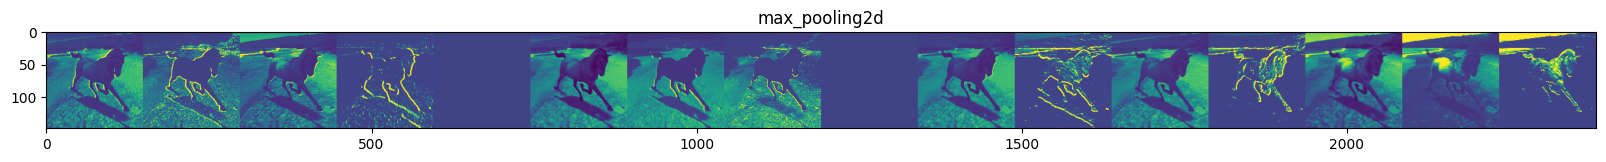

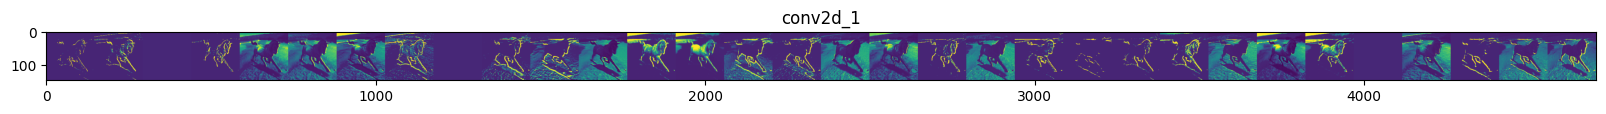

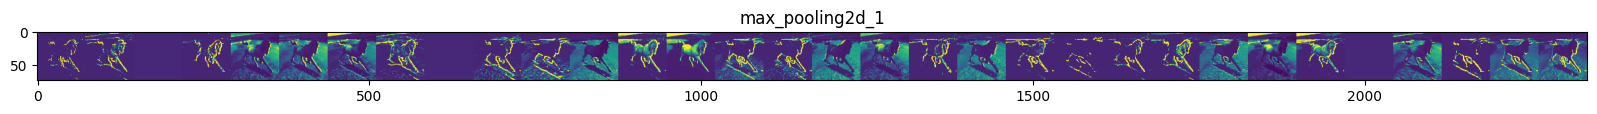

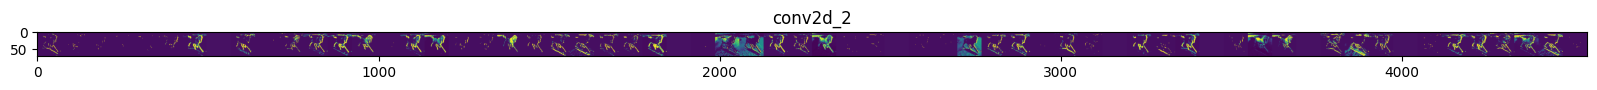

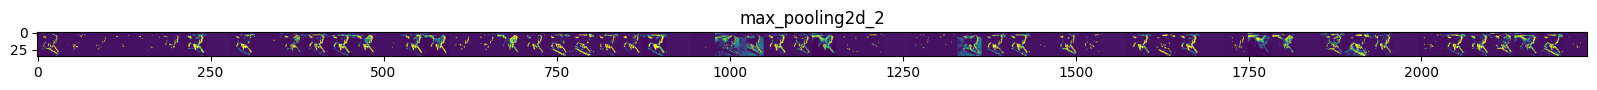

In [33]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's prepare a random input image from the training set.
# Corrected to get actual image file paths instead of directory paths
horse_img_files = [os.path.join(train_horse_dir, 'horses', f) for f in os.listdir(os.path.join(train_horse_dir, 'horses'))]
human_img_files = [os.path.join(train_human_dir, 'humans', f) for f in os.listdir(os.path.join(train_human_dir, 'humans'))]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Rescale by 1/255
x /= 255

# --- Modified part ---
# Get the input layer of the original model
input_layer = model.layers[0].input

# Create a list to store the layer outputs you want to visualize
successive_outputs = []
for layer in model.layers[1:]:  # Start from the second layer
    if len(layer.output.shape) == 4:  # Only include layers with 4D output shape
        successive_outputs.append(layer.output)

# Build the visualization model using the original model's input and the selected outputs
visualization_model = tf.keras.models.Model(inputs=input_layer, outputs=successive_outputs)
# --- End of modified part ---

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]  # Start from the second layer

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    n_features = feature_map.shape[-1]  # number of features in feature map
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      # Apply the condition and division element-wise
      x = np.where(x > 0, x / x.std(), x)  # Change this line
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')